In [7]:
import geopandas as gpd
import pandas as pd

In [14]:
gdf = gpd.read_file("./bairros_vigentes/bairros_vigentes.shp")
gdf = gdf.drop(columns=["OBJECTID", "CODIGO", "EDITOR", "DATA_EDICA", "SHAPE_AREA", "SHAPE_LEN"])
gdf.columns = ["Bairro", "geometry"]
gdf.head()

,Bairro,geometry
0,HÍPICA,"POLYGON ((283232.317 1664766.260, 283249.087 1..."
1,PASSO DAS PEDRAS,"POLYGON ((287595.213 1678609.133, 287635.971 1..."
2,HIGIENÓPOLIS,"POLYGON ((282819.328 1677715.723, 282809.697 1..."
3,VILA IPIRANGA,"POLYGON ((285882.786 1676864.358, 285806.568 1..."
4,ARQUIPÉLAGO,"POLYGON ((271705.957 1673614.159, 271705.446 1..."


<Axes: >

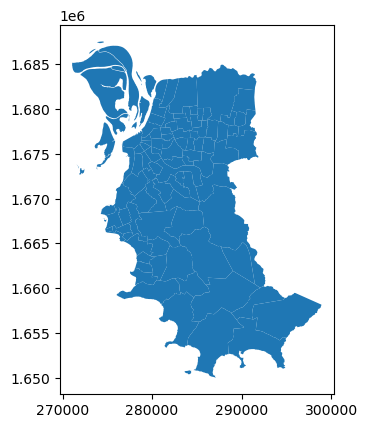

In [6]:
gdf.plot()

# Clean Inundação Data

In [19]:
df = pd.read_excel("Grafico_domicilios_particulares_por_bairros_4.xlsx")
df = df.drop(0)
df.columns = ["Bairro", "domicílios atingidos", "percentual do total de domicílios"]
df.head()

,Bairro,domicílios atingidos,percentual do total de domicílios
1,CENTRO HISTÓRICO,25574,7.463179
2,SARANDI,24221,7.068337
3,PARTENON,22884,6.678165
4,PETRÓPOLIS,22621,6.601414
5,MENINO DEUS,17452,5.092961


In [20]:
gdf = gdf.merge(df, on="Bairro")
gdf = gdf.dropna()
gdf.head()

,Bairro,geometry,domicílios atingidos_x,percentual do total de domicílios_x,domicílios atingidos_y,percentual do total de domicílios_y,domicílios atingidos,percentual do total de domicílios
0,HÍPICA,"POLYGON ((283232.317 1664766.260, 283249.087 1...",12312,3.592972,12312,3.592972,12312,3.592972
1,ARQUIPÉLAGO,"POLYGON ((271705.957 1673614.159, 271705.446 1...",2840,0.828788,2840,0.828788,2840,0.828788
2,ARQUIPÉLAGO,"POLYGON ((271617.528 1673751.892, 271618.061 1...",2840,0.828788,2840,0.828788,2840,0.828788
3,JARDIM SÃO PEDRO,"POLYGON ((284171.200 1680298.129, 284288.207 1...",1724,0.503109,1724,0.503109,1724,0.503109
4,JARDIM FLORESTA,"POLYGON ((285015.871 1680245.842, 285021.171 1...",1107,0.323052,1107,0.323052,1107,0.323052


In [27]:
gdf.to_file("data/bairros_domicilios_atingidos.shp", encoding="utf-8")

/tmp/ipykernel_178809/3167752449.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("data/bairros_domicilios_atingidos.shp.gz", encoding="utf-8")
